<a href="https://colab.research.google.com/github/jiakingng/demo/blob/main/Download_demo_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/fruit81/fruit81_full.zip

--2023-04-15 06:45:56--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/fruit81/fruit81_full.zip
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 724936499 (691M) [application/zip]
Saving to: ‘fruit81_full.zip’

fruit81_full.zip    100%[===================>] 691.35M  10.9MB/s    in 77s     

2023-04-15 06:47:16 (8.94 MB/s) - ‘fruit81_full.zip’ saved [724936499/724936499]



In [2]:
!unzip fruit81_full.zip >> /dev/null

In [5]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
dataset_path = 'fruit81_full'
os.chdir(dataset_path)
os.listdir()

['莲雾',
 '芦柑',
 '杨梅',
 '山竹',
 '草莓',
 '菠萝蜜',
 '樱桃',
 '石榴',
 '杏',
 '蟠桃',
 '佛手瓜',
 '柠檬',
 '甜瓜-金',
 '西瓜',
 '杨桃',
 '沃柑',
 '牛油果',
 '荔枝',
 '蓝莓',
 '沙棘',
 '血橙',
 '葡萄-白',
 '香蕉',
 '哈密瓜',
 '甜瓜-白',
 '砂糖橘',
 '猕猴桃',
 '水蜜桃',
 '桑葚',
 '番石榴-红',
 '无花果',
 '蛇皮果',
 '油桃',
 '粑粑柑',
 '青苹果',
 '甜瓜-伊丽莎白',
 '圣女果',
 '黄桃',
 '葡萄-红',
 '菠萝莓',
 '枇杷',
 '番石榴-百',
 '百香果',
 '胡萝卜',
 '西梅',
 '香橼',
 '榴莲',
 '脐橙',
 '柿子',
 '桂圆',
 '黑莓',
 '金桔',
 '人参果',
 '沙果',
 '青柠',
 '木瓜',
 '椰子',
 '树莓',
 '车厘子',
 '羊奶果',
 '橘子',
 '毛丹',
 '柚子',
 '西柚',
 '菠萝',
 '红心火龙果',
 '羊角蜜',
 '白萝卜',
 '红苹果',
 '酸角',
 '芒果',
 '白兰瓜',
 '李子',
 '白心火龙果',
 '山楂',
 '枣',
 '甜瓜-绿',
 '梨',
 '西红柿',
 '腰果',
 '甘蔗']

In [8]:
df = pd.DataFrame()
for fruit in tqdm(os.listdir()): # 遍历每个类别    
    os.chdir(fruit)
    for file in os.listdir(): # 遍历每张图像
        try:
            img = cv2.imread(file)
            df = df.append({'类别':fruit, '文件名':file, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
        except:
            print(os.path.join(fruit, file), '读取错误')
    os.chdir('../')
os.chdir('../')

流式输出内容被截断，只能显示最后 5000 行内容。
<ipython-input-8-e7f7fbc7f780>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'类别':fruit, '文件名':file, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
<ipython-input-8-e7f7fbc7f780>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'类别':fruit, '文件名':file, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
<ipython-input-8-e7f7fbc7f780>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'类别':fruit, '文件名':file, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
<ipython-input-8-e7f7fbc7f780>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

In [9]:
df

,类别,文件名,图像宽,图像高
0,莲雾,80.jpg,667,500
1,莲雾,72.jpg,750,500
2,莲雾,52.jpg,500,507
3,莲雾,116.jpg,500,500
4,莲雾,63.jpg,500,281
...,...,...,...,...
14428,甘蔗,164.jpg,500,375
14429,甘蔗,76.jpg,667,500
14430,甘蔗,145.jpg,591,500
14431,甘蔗,43.jpg,650,488


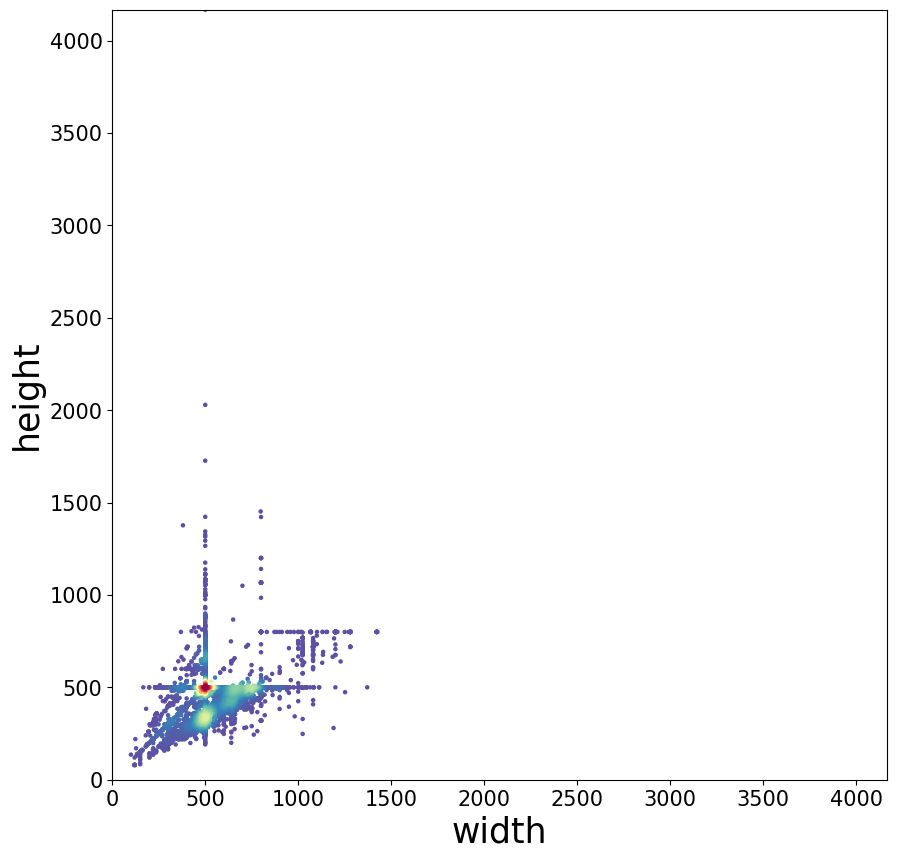

In [10]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

x = df['图像宽']
y = df['图像高']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(10,10))
# plt.figure(figsize=(12,12))
plt.scatter(x, y, c=z,  s=5, cmap='Spectral_r')
# plt.colorbar()
# plt.xticks([])
# plt.yticks([])

plt.tick_params(labelsize=15)

xy_max = max(max(df['图像宽']), max(df['图像高']))
plt.xlim(xmin=0, xmax=xy_max)
plt.ylim(ymin=0, ymax=xy_max)

plt.ylabel('height', fontsize=25)
plt.xlabel('width', fontsize=25)

plt.savefig('图像尺寸分布.pdf', dpi=120, bbox_inches='tight')

plt.show()

In [11]:
import os
import shutil
import random
import pandas as pd

In [12]:
dataset_path = 'fruit81_full'

In [13]:
dataset_name = dataset_path.split('_')[0]
print('数据集', dataset_name)

数据集 fruit81


In [15]:
classes = os.listdir(dataset_path)

In [16]:
len(classes)

81

In [17]:
classes

['莲雾',
 '芦柑',
 '杨梅',
 '山竹',
 '草莓',
 '菠萝蜜',
 '樱桃',
 '石榴',
 '杏',
 '蟠桃',
 '佛手瓜',
 '柠檬',
 '甜瓜-金',
 '西瓜',
 '杨桃',
 '沃柑',
 '牛油果',
 '荔枝',
 '蓝莓',
 '沙棘',
 '血橙',
 '葡萄-白',
 '香蕉',
 '哈密瓜',
 '甜瓜-白',
 '砂糖橘',
 '猕猴桃',
 '水蜜桃',
 '桑葚',
 '番石榴-红',
 '无花果',
 '蛇皮果',
 '油桃',
 '粑粑柑',
 '青苹果',
 '甜瓜-伊丽莎白',
 '圣女果',
 '黄桃',
 '葡萄-红',
 '菠萝莓',
 '枇杷',
 '番石榴-百',
 '百香果',
 '胡萝卜',
 '西梅',
 '香橼',
 '榴莲',
 '脐橙',
 '柿子',
 '桂圆',
 '黑莓',
 '金桔',
 '人参果',
 '沙果',
 '青柠',
 '木瓜',
 '椰子',
 '树莓',
 '车厘子',
 '羊奶果',
 '橘子',
 '毛丹',
 '柚子',
 '西柚',
 '菠萝',
 '红心火龙果',
 '羊角蜜',
 '白萝卜',
 '红苹果',
 '酸角',
 '芒果',
 '白兰瓜',
 '李子',
 '白心火龙果',
 '山楂',
 '枣',
 '甜瓜-绿',
 '梨',
 '西红柿',
 '腰果',
 '甘蔗']

In [18]:
# 创建 train 文件夹
os.mkdir(os.path.join(dataset_path, 'train'))

# 创建 test 文件夹
os.mkdir(os.path.join(dataset_path, 'val'))

# 在 train 和 test 文件夹中创建各类别子文件夹
for fruit in classes:
    os.mkdir(os.path.join(dataset_path, 'train', fruit))
    os.mkdir(os.path.join(dataset_path, 'val', fruit))

In [19]:
test_frac = 0.2  # 测试集比例
random.seed(123) # 随机数种子，便于复现

In [20]:
df = pd.DataFrame()

print('{:^18} {:^18} {:^18}'.format('类别', '训练集数据个数', '测试集数据个数'))

for fruit in classes: # 遍历每个类别

    # 读取该类别的所有图像文件名
    old_dir = os.path.join(dataset_path, fruit)
    images_filename = os.listdir(old_dir)
    random.shuffle(images_filename) # 随机打乱

    # 划分训练集和测试集
    testset_numer = int(len(images_filename) * test_frac) # 测试集图像个数
    testset_images = images_filename[:testset_numer]      # 获取拟移动至 test 目录的测试集图像文件名
    trainset_images = images_filename[testset_numer:]     # 获取拟移动至 train 目录的训练集图像文件名

    # 移动图像至 test 目录
    for image in testset_images:
        old_img_path = os.path.join(dataset_path, fruit, image)         # 获取原始文件路径
        new_test_path = os.path.join(dataset_path, 'val', fruit, image) # 获取 test 目录的新文件路径
        shutil.move(old_img_path, new_test_path) # 移动文件

    # 移动图像至 train 目录
    for image in trainset_images:
        old_img_path = os.path.join(dataset_path, fruit, image)           # 获取原始文件路径
        new_train_path = os.path.join(dataset_path, 'train', fruit, image) # 获取 train 目录的新文件路径
        shutil.move(old_img_path, new_train_path) # 移动文件
    
    # 删除旧文件夹
    assert len(os.listdir(old_dir)) == 0 # 确保旧文件夹中的所有图像都被移动走
    shutil.rmtree(old_dir) # 删除文件夹
    
    # 工整地输出每一类别的数据个数
    print('{:^18} {:^18} {:^18}'.format(fruit, len(trainset_images), len(testset_images)))
    
    # 保存到表格中
    df = df.append({'class':fruit, 'trainset':len(trainset_images), 'testset':len(testset_images)}, ignore_index=True)

# 重命名数据集文件夹
shutil.move(dataset_path, dataset_name+'_split')

# 数据集各类别数量统计表格，导出为 csv 文件
df['total'] = df['trainset'] + df['testset']
df.to_csv('数据量统计.csv', index=False)

        类别              训练集数据个数            测试集数据个数      
        莲雾                156                 39        
        芦柑                146                 36        
        杨梅                153                 38        
        山竹                152                 38        
        草莓                159                 39        
       菠萝蜜                160                 39        
        樱桃                133                 33        
        石榴                153                 38        
        杏                 158                 39        
        蟠桃                145                 36        
       佛手瓜                129                 32        
        柠檬                122                 30        
       甜瓜-金                42                 10        
        西瓜                156                 38        
        杨桃                157                 39        
        沃柑                159                 39        
       牛油果                120  

<ipython-input-20-9e191af34ea4>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'class':fruit, 'trainset':len(trainset_images), 'testset':len(testset_images)}, ignore_index=True)
<ipython-input-20-9e191af34ea4>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'class':fruit, 'trainset':len(trainset_images), 'testset':len(testset_images)}, ignore_index=True)
<ipython-input-20-9e191af34ea4>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'class':fruit, 'trainset':len(trainset_images), 'testset':len(testset_images)}, ignore_index=True)
<ipython-input-20-9e191af34ea4>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

       水蜜桃                141                 35        
        桑葚                156                 39        
      番石榴-红               121                 30        
       无花果                156                 39        
       蛇皮果                138                 34        
        油桃                160                 39        
       粑粑柑                154                 38        
       青苹果                156                 39        
     甜瓜-伊丽莎白               75                 18        
       圣女果                158                 39        
        黄桃                155                 38        
       葡萄-红               160                 39        
       菠萝莓                 91                 22        
        枇杷                151                 37        
      番石榴-百               105                 26        
       百香果                151                 37        
       胡萝卜                149                 37        
        西梅                158  

<ipython-input-20-9e191af34ea4>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'class':fruit, 'trainset':len(trainset_images), 'testset':len(testset_images)}, ignore_index=True)
<ipython-input-20-9e191af34ea4>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'class':fruit, 'trainset':len(trainset_images), 'testset':len(testset_images)}, ignore_index=True)
<ipython-input-20-9e191af34ea4>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'class':fruit, 'trainset':len(trainset_images), 'testset':len(testset_images)}, ignore_index=True)
<ipython-input-20-9e191af34ea4>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

       车厘子                136                 33        
       羊奶果                156                 39        
        橘子                145                 36        
        毛丹                127                 31        
        柚子                156                 39        
        西柚                147                 36        
        菠萝                158                 39        
      红心火龙果               159                 39        
       羊角蜜                157                 39        
       白萝卜                160                 39        
       红苹果                142                 35        
        酸角                153                 38        
        芒果                139                 34        
       白兰瓜                103                 25        
        李子                154                 38        
      白心火龙果               148                 37        
        山楂                159                 39        
        枣                 156  

<ipython-input-20-9e191af34ea4>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'class':fruit, 'trainset':len(trainset_images), 'testset':len(testset_images)}, ignore_index=True)
<ipython-input-20-9e191af34ea4>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'class':fruit, 'trainset':len(trainset_images), 'testset':len(testset_images)}, ignore_index=True)
<ipython-input-20-9e191af34ea4>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'class':fruit, 'trainset':len(trainset_images), 'testset':len(testset_images)}, ignore_index=True)
<ipython-input-20-9e191af34ea4>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

In [21]:
df

,class,trainset,testset,total
0,莲雾,156,39,195
1,芦柑,146,36,182
2,杨梅,153,38,191
3,山竹,152,38,190
4,草莓,159,39,198
...,...,...,...,...
76,甜瓜-绿,35,8,43
77,梨,155,38,193
78,西红柿,150,37,187
79,腰果,160,40,200


In [26]:
!sudo apt-get update
!sudo apt-get install tree



Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.8.0-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upg

In [29]:
!tree fruit81_split -L 2

fruit81_split
├── train
│   ├── 人参果
│   ├── 佛手瓜
│   ├── 哈密瓜
│   ├── 圣女果
│   ├── 山楂
│   ├── 山竹
│   ├── 无花果
│   ├── 木瓜
│   ├── 李子
│   ├── 杏
│   ├── 杨桃
│   ├── 杨梅
│   ├── 枇杷
│   ├── 枣
│   ├── 柚子
│   ├── 柠檬
│   ├── 柿子
│   ├── 树莓
│   ├── 桂圆
│   ├── 桑葚
│   ├── 梨
│   ├── 椰子
│   ├── 榴莲
│   ├── 樱桃
│   ├── 橘子
│   ├── 毛丹
│   ├── 水蜜桃
│   ├── 沃柑
│   ├── 沙果
│   ├── 沙棘
│   ├── 油桃
│   ├── 牛油果
│   ├── 猕猴桃
│   ├── 甘蔗
│   ├── 甜瓜-伊丽莎白
│   ├── 甜瓜-白
│   ├── 甜瓜-绿
│   ├── 甜瓜-金
│   ├── 番石榴-百
│   ├── 番石榴-红
│   ├── 白兰瓜
│   ├── 白心火龙果
│   ├── 白萝卜
│   ├── 百香果
│   ├── 石榴
│   ├── 砂糖橘
│   ├── 粑粑柑
│   ├── 红心火龙果
│   ├── 红苹果
│   ├── 羊奶果
│   ├── 羊角蜜
│   ├── 胡萝卜
│   ├── 脐橙
│   ├── 腰果
│   ├── 芒果
│   ├── 芦柑
│   ├── 草莓
│   ├── 荔枝
│   ├── 莲雾
│   ├── 菠萝
│   ├── 菠萝莓
│   ├── 菠萝蜜
│   ├── 葡萄-白
│   ├── 葡萄-红
│   ├── 蓝莓
│   ├── 蛇皮果
│   ├── 蟠桃
│   ├── 血橙
│   ├── 西柚
│   ├── 西梅
│   ├── 西瓜
│   ├── 西红柿
│   ├── 车厘子
│   ├── 酸角
│   ├── 金桔
│   ├── 青柠
│   ├── 青苹果
│   ├── 香橼
│   ├── 香蕉
│   ├── 黄桃
│   └── 黑莓
└── val
    ├── 人参果
    ├── 佛手瓜
    ├─

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

import numpy as np
import math
import os

import cv2

from tqdm import tqdm

In [31]:
folder_path = 'fruit81_split/train/西瓜'

In [32]:
N = 36

In [33]:
n = math.floor(np.sqrt(N))
n

6

In [34]:
images = []
for each_img in os.listdir(folder_path)[:N]:
    img_path = os.path.join(folder_path, each_img)
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    images.append(img_rgb)

In [35]:
len(images)

36

<ipython-input-36-883eb792d0a1>:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


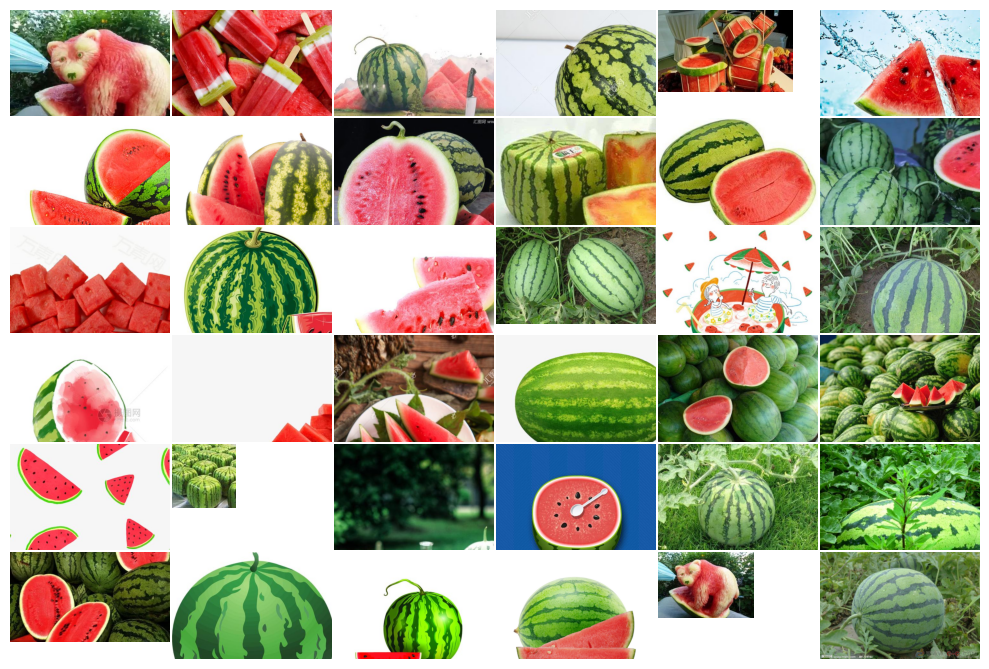

In [36]:
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # 类似绘制子图 subplot(111)
                 nrows_ncols=(n, n),  # 创建 n 行 m 列的 axes 网格
                 axes_pad=0.02,  # 网格间距
                 share_all=True
                 )

# 遍历每张图像
for ax, im in zip(grid, images):
    ax.imshow(im)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf: No such file or directory


In [40]:
df = pd.read_csv('数据量统计.csv')

In [41]:
df.shape

(81, 4)

In [42]:
df


,class,trainset,testset,total
0,莲雾,156,39,195
1,芦柑,146,36,182
2,杨梅,153,38,191
3,山竹,152,38,190
4,草莓,159,39,198
...,...,...,...,...
76,甜瓜-绿,35,8,43
77,梨,155,38,193
78,西红柿,150,37,187
79,腰果,160,40,200


In [43]:
# 指定可视化的特征
feature = 'total'
# feature = 'trainset'
# feature = 'testset'

In [44]:
df = df.sort_values(by=feature, ascending=False)

In [45]:
df.head()

,class,trainset,testset,total
79,腰果,160,40,200
5,菠萝蜜,160,39,199
67,白萝卜,160,39,199
38,葡萄-红,160,39,199
32,油桃,160,39,199


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33136 (\N{CJK UNIFIED IDEOGRAPH-8170}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33760 (\N{CJK UNIFIED IDEOGRAPH-83E0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33821 (\N{CJK UNIFIED IDEOGRAPH-841D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 34588 (\N{CJK UNIFIED IDEOGRAPH-871C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

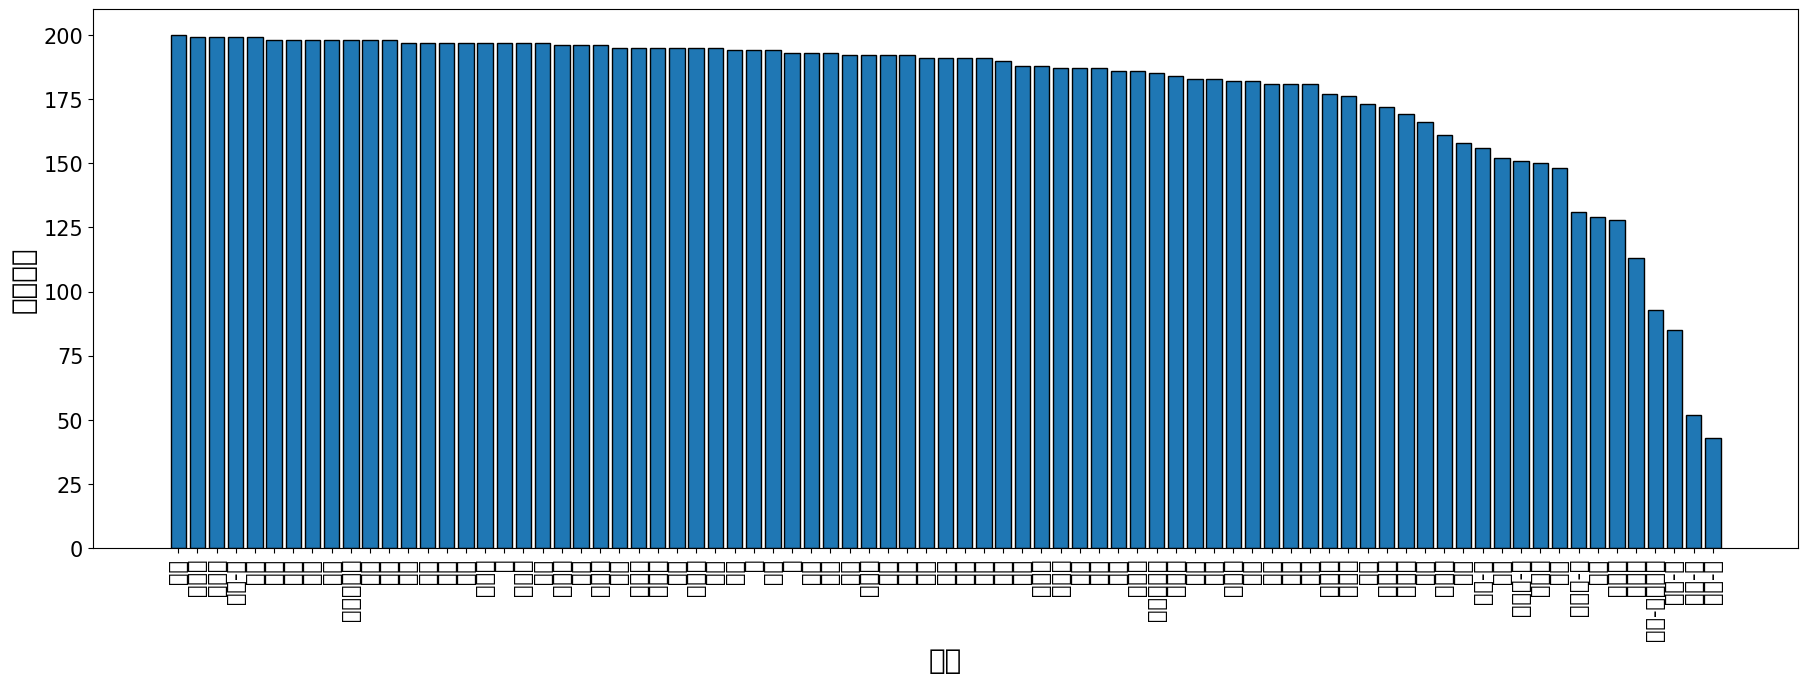

In [46]:
plt.figure(figsize=(22, 7))

x = df['class']
y = df[feature]

plt.bar(x, y, facecolor='#1f77b4', edgecolor='k')

plt.xticks(rotation=90)
plt.tick_params(labelsize=15)
plt.xlabel('类别', fontsize=20)
plt.ylabel('图像数量', fontsize=20)

# plt.savefig('各类别图片数量.pdf', dpi=120, bbox_inches='tight')

plt.show()